In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ColabNotebooks/Table_work"

/content/drive/MyDrive/ColabNotebooks/Table_work


# **Install Mmdetection**

In [ ]:
#!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
#!git clone 'https://github.com/open-mmlab/mmdetection.git'
!pip install -r "/content/drive/MyDrive/ColabNotebooks/Table_work/mmdetection/requirements/optional.txt"
%cd mmdetection/
!python setup.py install
!python setup.py develop
!pip install -r {"/content/drive/MyDrive/ColabNotebooks/Table_work/mmdetection/requirements.txt"}
!pip install pillow
!pip install mmcv
!pip install mmcv-full
%cd ..

In [ ]:
!pip uninstall pycocotools
!pip uninstall mmpycocotools
!pip install mmpycocotools

#  **Training Models**

In [ ]:
!python  /content/drive/MyDrive/ColabNotebooks/Table_work/mmdetection/tools/train.py '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/HRNets/FCOS/HRNetV2p-W32_1x/fcos_hrnetv2p_w32_gn-head_4x4_1x_coco.py'

In [ ]:
#!python -m torch.distributed.launch --nproc_per_node=1 /content/drive/MyDrive/ColabNotebooks/Table_work/mmdetection/tools/train.py   '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/resnest/Faster R-CNN/S-101-FPN/faster_rcnn_s101_fpn_syncbn-backbone+head_mstrain-range_1x_coco.py' --launcher pytorch

#  **Test File**

In [ ]:
!python mmdetection/tools/test.py '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/YOLOv3/DarkNet-53_608/yolov3_d53_mstrain-608_273e_coco.py' '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/YOLOv3/DarkNet-53_608/epoch_127.pth'  --eval  bbox 


# **Calculate  F1 score**

In [ ]:

avg_precision=    0.733
avg_recall=       0.848
f1_score_before = 0.786
f1_score = (2 * avg_precision * avg_recall)  / (avg_precision + avg_recall)
print( avg_precision, avg_recall ,f1_score)

f1= int((f1_score * 1000)) / 1000.0
print(f1_score_before == f1 ) 

0.733 0.848 0.7863175205566096
True


drive  path-to-random-log-file1.txt  path-to-random-log-file.txt  sample_data


#evalution 


Use load_from_local loader
True
[array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([[1.7096745e+02, 2.5369975e+02, 1.0422629e+03, 1.4802524e+03,
        9.9986792e-01]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32)]


/content/drive/MyDrive/ColabNotebooks/Table_work/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


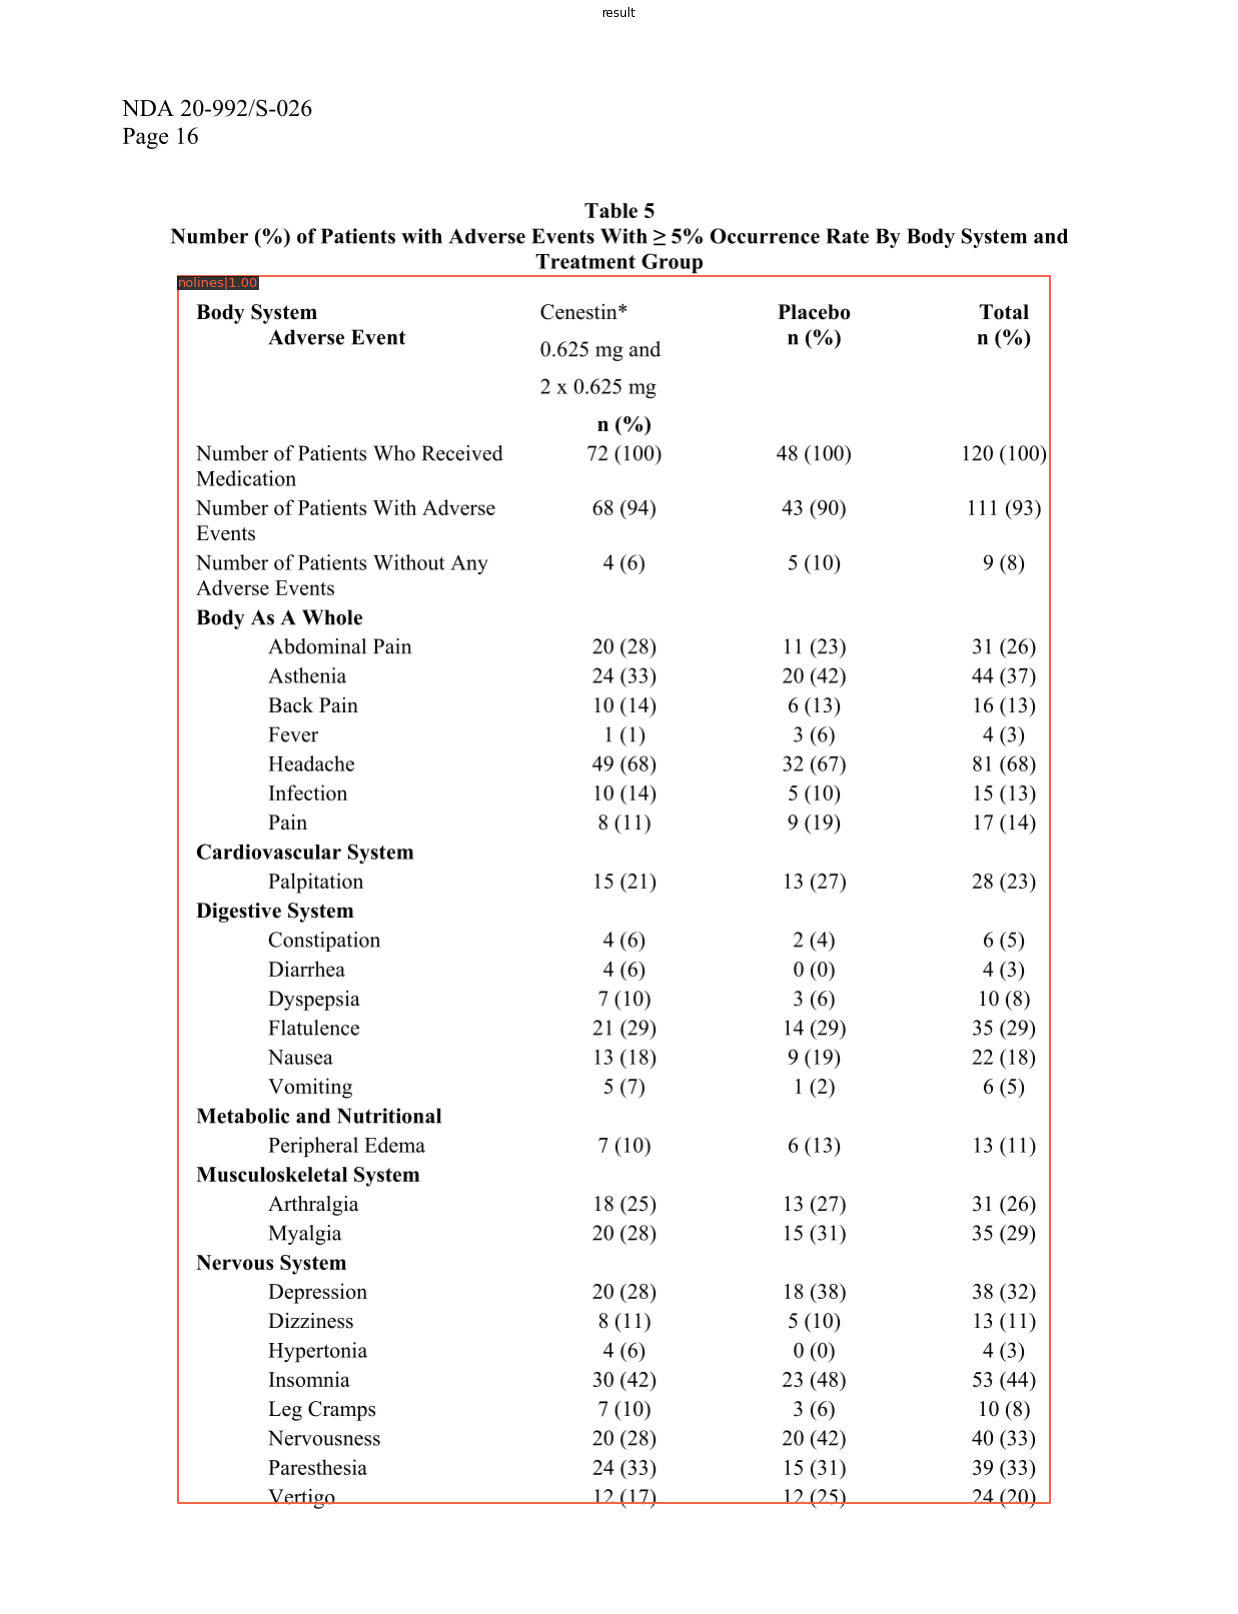

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot#,show_result
from mmdet.models.detectors import BaseDetector
import mmcv
import os
from pathlib import Path

# Load model
config_file = '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/CascadeRCNN/ResNeXt/cascade_rcnn_x101_32x4d_fpn_1x_coco.py'
checkpoint_file = '/content/drive/MyDrive/ColabNotebooks/Table_work/output_mmdetection/CascadeRCNN/ResNeXt/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
#root = os.getcwd()

# img = r"data/VOC2007/JPEGImages/test_images/1.jpg"
img = "/content/drive/MyDrive/ColabNotebooks/Table_work/data/VOC2007/JPEGImages/06256bb56032ccabb5e7e8e488105879-14.png"#os.path.join(root, "data", "VOC2007", "JPEGImages", "testimages", "1.jpg")
print(os.path.isfile(img))
# Run Inference
result = inference_detector(model, img)
print(result)
#image_1=cv2.imread(img)
"""['full_lined',
 'merged_cells',
 'nolines',
 'partial_lined',
 'partial_lined_merged_cells']"""
# Visualization results
#show_result_pyplot(img, result,('full_lined', 'merged_cells', 'nolines','partial_lined','partial_lined_merged_cells'), score_thr=0.5)
#save output image
show_result_pyplot(model, img, result, score_thr=0.5)
#('full_lined', 'merged_cells', 'nolines','partial_lined','partial_lined_merged_cells')
BaseDetector.show_result(model,img,result, score_thr=0.5,out_file='20_result_2.jpg')